# Part 2: Practical Implementation (50%)
# Task 1: Classical ML with Scikit-learn



In [2]:
#import necessary libraries
import pandas as pd
import numpy as np

#load the data for analysis
df = pd.read_csv("Iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
#preprocessing the data
#check for missing values and fill them
df.isnull().sum()
df_clean = df.fillna(0)
df_clean.isnull().sum()
print(df_clean)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [4]:
#encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_clean['Species'] = le.fit_transform(df_clean['Species'])
print(df_clean)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        2
146  147            6.3           2.5            5.0           1.9        2
147  148            6.5           3.0            5.2           2.0        2
148  149            6.2           3.4            5.4           2.3        2
149  150            5.9           3.0            5.1           1.8        2

[150 rows x 6 columns]


In [6]:
#training a decision tree classifier to predict iris species
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df_clean.drop('Species', axis=1)
y = df_clean['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 1.0


In [7]:
# Evaluate using accuracy, precision, and recall
#Evaluate using accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Evaluate using precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

#Evaluate using recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


# Task 2: Deep Learning with TensorFlow/PyTorch

In [8]:
#import requied libraries
import tensorflow as tf

#load the mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#preprocess the dataset
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

#build the cnn model
model = tf.keras.models.Sequential([
    #First Convolutional Block + pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #Second Convolutional Block + pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #  Classification
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train the model
model.fit(x_train, y_train, epochs=5)

#evaluate the model
model.evaluate(x_test, y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.8696 - loss: 0.4116
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9791 - loss: 0.0727
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9841 - loss: 0.0530
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9868 - loss: 0.0420
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9889 - loss: 0.0357
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9893 - loss: 0.0270


[0.021506933495402336, 0.991599977016449]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


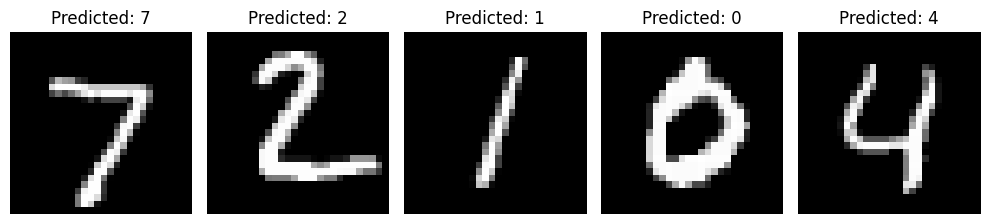

In [9]:
#Visualize the model’s predictions on 5 sample images.
#import required libraies
import matplotlib.pyplot as plt
import numpy as np

# Get 5 sample images and their predictions
sample_images = x_test[:5]

predictions = model.predict(sample_images)

# Plot the images and their predicted labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Task 3: NLP with spaCy

In [13]:
#import required libraries
import spacy
import pandas as pd
import zipfile,bz2
import os

#Unzip and decompress the file
zip_path = "test.ft.txt.bz2.zip"
extract_dir = '/content/extracted'

os.makedirs(extract_dir, exist_ok=True)

#unzip outer zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Decompress the .bz2 file
bz2_path = os.path.join(extract_dir, 'test.ft.txt.bz2')

lines = []
with bz2.open(bz2_path, 'rt', encoding='utf-8', errors='ignore') as f:
    for i, line in enumerate(f):
        lines.append(line.strip())
        if i >= 999:  # Load first 1000 lines to start
            break

print("✅ Loaded", len(lines), "reviews")
print("\nSample line:\n", lines[0])

✅ Loaded 1000 reviews

Sample line:
 __label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"


In [14]:
#clean the data
clean_texts = [line.split(' ', 1)[1] for line in lines if ' ' in line]
print("Sample cleaned text:\n", clean_texts[0])


Sample cleaned text:
 Great Camera: I recently purchased this camera and I'm very satisfied with it. I find the quality of the pictures with this camera as good if not better than anything else without going to digital. It is very comfortable to hold and the controls are easy to use. I highly reccomend this product to anyone looking for a top quality camera at an affordable price. Nice going Sony!


In [17]:
#Run spaCy NER to extract product and brand names
from collections import Counter

#load model
nlp = spacy.load("en_core_web_sm")

entities = []

# Process first 100 reviews for demo (you can increase this later)
for doc in nlp.pipe(clean_texts[:100], disable=["parser", "tagger"]):
    for ent in doc.ents:
        if ent.label_ in ["ORG", "PRODUCT", "WORK_OF_ART"]:
            entities.append((ent.text, ent.label_))

# Show results
for i in range(20):
    print(entities[i])

('GREAT', 'ORG')
('EVERYBODY', 'ORG')
('Their Powerex MH-C204F', 'ORG')
('VHS', 'ORG')
('hte', 'ORG')
('JVC', 'ORG')
('Sony', 'ORG')
('JVC', 'ORG')
('El Duke', 'ORG')
('TRULY', 'ORG')
('Amazon', 'ORG')
('USB', 'ORG')
('AWESOME', 'ORG')
('UN', 'ORG')
('LAS HISTORIA DE LOS BOXEADORES', 'ORG')
('MÁS BRILLANTES', 'ORG')
('DE LOS', 'ORG')
('DURANTE', 'ORG')
('Victoria', 'ORG')
('Sony', 'ORG')


In [20]:
#Analyze sentiment (positive/negative) using a rule-based approach.
#import required liblaries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon if you haven't already
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')

#Initialze the analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment for the cleaned reviews
sentiments = []
for text in clean_texts:
    vs = analyzer.polarity_scores(text)
    sentiment = "positive" if vs['compound'] > 0.05 else ("negative" if vs['compound'] < -0.05 else "neutral")
    sentiments.append((text, sentiment, vs['compound']))

# Print the first 10 results as a sample
for text, sentiment, compound_score in sentiments[:10]:
    print(f"Review: {text[:100]}...") # Print first 100 characters
    print(f"Sentiment: {sentiment} (Compound Score: {compound_score})\n")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Review: Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD fo...
Sentiment: positive (Compound Score: 0.9569)

Review: One of the best game music soundtracks - for a game I didn't really play: Despite the fact that I ha...
Sentiment: positive (Compound Score: 0.877)

Review: Batteries died within a year ...: I bought this charger in Jul 2003 and it worked OK for a while. Th...
Sentiment: positive (Compound Score: 0.7297)

Review: works fine, but Maha Energy is better: Check out Maha Energy's website. Their Powerex MH-C204F charg...
Sentiment: positive (Compound Score: 0.7845)

Review: Great for the non-audiophile: Reviewed quite a bit of the combo players and was hesitant due to unfa...
Sentiment: positive (Compound Score: 0.8388)

Review: DVD Player crapped out after one year: I also began having the incorrect disc problems that I've rea...
Sentiment: negative (Compound Score: -0.3506)

Review: Incorrect Disc: I love the style of this, bu

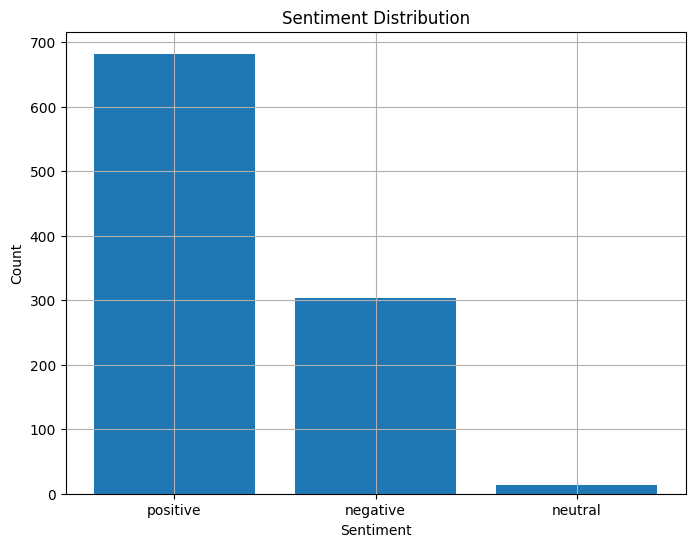

In [24]:
#vizualize sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sentiment_counts = Counter(sentiment for _, sentiment, _ in sentiments)
plt.bar(sentiment_counts.keys(), sentiment_counts.values())
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.grid(True)
plt.show()




Deploying trained model on streamlit

In [32]:
import streamlit as st
import joblib
import numpy as np

# Save the trained model
joblib.dump(clf, 'decision_tree_model.pkl')

# Load the trained model
model = joblib.load('decision_tree_model.pkl')

st.title('Iris Species Prediction')

st.write('Enter the measurements of the Iris flower to predict its species.')

# Get input from the user
sepal_length = st.slider('Sepal Length (cm)', 0.0, 10.0, 5.0)
sepal_width = st.slider('Sepal Width (cm)', 0.0, 5.0, 3.0)
petal_length = st.slider('Petal Length (cm)', 0.0, 10.0, 4.0)
petal_width = st.slider('Petal Width (cm)', 0.0, 5.0, 1.0)

# Create a numpy array from the input
# The model was trained with an 'Id' column, so we need to add a placeholder for it.
# Since 'Id' is not used for prediction, we can use a dummy value like 0.
features = np.array([[0, sepal_length, sepal_width, petal_length, petal_width]])


if st.button('Predict'):
    prediction = model.predict(features)
    species = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])[prediction][0]
    st.success(f'The predicted species is: {species}')

2025-10-29 15:12:18.537 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 15:12:18.538 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 15:12:18.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 15:12:18.541 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 15:12:18.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 15:12:18.544 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 15:12:18.546 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 15:12:18.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [33]:
# Save the streamlit app code to a python file
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

# Load the trained model
model = joblib.load('decision_tree_model.pkl')

st.title('Iris Species Prediction')

st.write('Enter the measurements of the Iris flower to predict its species.')

# Get input from the user
sepal_length = st.slider('Sepal Length (cm)', 0.0, 10.0, 5.0)
sepal_width = st.slider('Sepal Width (cm)', 0.0, 5.0, 3.0)
petal_length = st.slider('Petal Length (cm)', 0.0, 10.0, 4.0)
petal_width = st.slider('Petal Width (cm)', 0.0, 5.0, 1.0)

# Create a numpy array from the input
# The model was trained with an 'Id' column, so we need to add a placeholder for it.
# Since 'Id' is not used for prediction, we can use a dummy value like 0.
features = np.array([[0, sepal_length, sepal_width, petal_length, petal_width]])


if st.button('Predict'):
    prediction = model.predict(features)
    species = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])[prediction][0]
    st.success(f'The predicted species is: {species}')

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501